# Exploratory Data Analysis of World Population 2023

Have you ever wondered about the distribution of the world's population or the countries that are experiencing the fastest growth? In this project, we will use exploratory data analysis to shed light on these questions and more. By working with data on the world population in 2023, we will be able to gain a better understanding of the trends and patterns that are shaping the world today. From population size and density to growth rates and demographic shifts, this project will provide a comprehensive look at the world population in 2023. So whether you are interested in demographics, geography, or world population trends, this project has something for you. Let's get started!



# 1. Import The Libraries
You will need to import the necessary libraries such as Pandas, Numpy, Matplotlib, and Seaborn. 

In [63]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

sns.set_style('darkgrid');

# 2. Import The Data
The next step is to import the World Population 2023 data.
You'll need to install the `openpyxl` library in order to import an Excel file. Once the library is installed, you can import the Excel file using the Pandas `read_excel()` function.

In [64]:
df = pd.read_excel('C:/Users/kesha/Downloads/world_population2023.xlsx')
df

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...,...
200,200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


# 3. Clean The Data
After importing the data, the next step is to clean and preprocess the data to ensure that it is ready for analysis. This may include handling missing values, converting data types, removing outliers, etc.

### Handling Missing Values
 Missing values can have a significant impact on the results of your analysis, so it's important to handle them appropriately. You can use the Pandas `isnull()` function to check for missing values and then use the `fillna()` function to handle them.

In [65]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0            0
country name          0
current population    0
population 2022       0
area                  0
land area             0
density               0
growth rate           0
world percentage      1
rank                  0
dtype: int64

In [66]:
# Filling missing values
df['world percentage'].fillna('0.00%', inplace = True)

### Handling Duplicates
Duplicate data can also have a significant impact on your analysis, so it's important to identify and remove duplicates. You can use the Pandas `duplicated()` function to identify duplicates and then use the `drop_duplicates()` function to remove them. 

In [67]:
# Checking for duplicates
df[df.duplicated()] 

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank


No duplicate values present in dataset.

### Dropping Columns
Dropping columns involves removing columns that are not needed. You can use the Pandas `drop()` function to drop columns from your dataframe. 
`axis=1` specifies that you want to drop columns (as opposed to rows). The `inplace=True` argument specifies that you want to modify the original dataframe, rather than creating a new one.

In [68]:
# Dropping the "Unnamed: 0" column
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


### Sorting the index
Sorting the index in a data cleaning process is a step where you sort the data based on the index values of the data. This can be useful for organizing the data in a specific order and making it easier to perform further analysis. In Pandas, you can use the `sort_index()` method to sort the data based on the index.

In [69]:
# Sorting data based on index in ascending order
df.sort_index(axis=0, ascending=True, inplace=True)
df

,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


### Converting Columns Names Into Title Case
Converting column names into title case is another step in the data cleaning process that helps improve the readability and consistency of the data.
You can also use the `str` method along with the `title()` method to convert column names to title case in a Pandas DataFrame.

In [70]:
# Converting all column names to title case
df.columns = df.columns.str.title()
df

,Country Name,Current Population,Population 2022,Area,Land Area,Density,Growth Rate,World Percentage,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


### Renaming Column Names
Renaming column names is another important step in the data cleaning process. This is particularly useful if the column names are not descriptive or contain spaces, special characters, or capital letters that make it difficult to access the data using code.
It's important to note that the `rename()` function takes a `columns` argument that is a dictionary mapping the old column names to the new column names. By setting `inplace=True`, the changes will be made in the original DataFrame.

In [71]:
# Renaming Columns 
df.rename(columns = {"Country Name":"Country"},inplace = True)
df.rename(columns = {'Current Population':"Population 2023"},inplace = True)
df.rename(columns = {'Area':'Area(km²)'},inplace = True)
df.rename(columns = {'Land Area':'Land Area(km²)'},inplace = True)
df.rename(columns = {'Density':'Density (/km²)'},inplace = True)
df.rename(columns = {'World Percentage':'World %'},inplace = True)
df

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


### Removing/Replacing Unwanted Characters
In the data cleaning process, it is common to encounter values that contain unwanted characters, such as commas (`,`) or percent signs (`%`). To remove these characters, you can use the Pandas `str.replace()` function.

In [72]:
# Replacing commas and percent signs
df['Population 2023'] = df['Population 2023'].str.replace(',', '')
df['Population 2022'] = df['Population 2022'].str.replace(',', '')
df['Density (/km²)'] = df['Density (/km²)'].str.replace(',', '')
df['Growth Rate'] = df['Growth Rate'].str.replace('%', '')
df['World %'] = df['World %'].str.replace('%', '')
df

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,33642,33660,61,60,561,-0.05,0.00,218
201,Palau,18058,18055,459,460,39,0.02,0.00,222
202,Nauru,12780,12668,21,20,639,0.88,0.00,225
203,Tuvalu,11396,11312,26,30,380,0.74,0.00,227


### Converting Data Types
It's important to ensure that the data types of the columns are appropriate for the analysis. You can use the Pandas `astype()` function to convert data types.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          205 non-null    object
 1   Population 2023  205 non-null    object
 2   Population 2022  205 non-null    object
 3   Area(km²)        205 non-null    object
 4   Land Area(km²)   205 non-null    object
 5   Density (/km²)   205 non-null    object
 6   Growth Rate      205 non-null    object
 7   World %          205 non-null    object
 8   Rank             205 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 14.5+ KB


In [74]:
df = df.astype({
    "Population 2023": np.int64,
    "Population 2022": np.int64,
    "Density (/km²)": np.float64,
    "Growth Rate": np.float64,
    "World %": np.float64
},errors = "raise")
df.dtypes

Country             object
Population 2023      int64
Population 2022      int64
Area(km²)           object
Land Area(km²)      object
Density (/km²)     float64
Growth Rate        float64
World %            float64
Rank                 int64
dtype: object

# 4. Summarize The Data
Once the data is clean, the next step is to summarize the data using descriptive statistics. You can use Pandas functions such as `head()`, `tail()`, `info()`, `describe()`, etc. to get a quick overview of the data.

In [75]:
df.head()

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481.0,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312.0,1.98,3.00,5


In [76]:
df.tail()

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
200,San Marino,33642,33660,61,60,561.0,-0.05,0.0,218
201,Palau,18058,18055,459,460,39.0,0.02,0.0,222
202,Nauru,12780,12668,21,20,639.0,0.88,0.0,225
203,Tuvalu,11396,11312,26,30,380.0,0.74,0.0,227
204,Vatican City,518,510,< 1,< 1,1177.0,1.57,0.0,234


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          205 non-null    object 
 1   Population 2023  205 non-null    int64  
 2   Population 2022  205 non-null    int64  
 3   Area(km²)        205 non-null    object 
 4   Land Area(km²)   205 non-null    object 
 5   Density (/km²)   205 non-null    float64
 6   Growth Rate      205 non-null    float64
 7   World %          205 non-null    float64
 8   Rank             205 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 14.5+ KB


In [78]:
df.describe()

,Population 2023,Population 2022,Density (/km²),Growth Rate,World %,Rank
count,2.050000e+02,2.050000e+02,205.000000,205.000000,205.000000,205.000000
mean,3.907452e+07,3.888173e+07,344.059220,1.064878,0.490146,104.351220
std,1.458696e+08,1.455222e+08,1482.715257,1.277604,1.826207,61.585136
min,5.180000e+02,5.100000e+02,0.140000,-7.450000,0.000000,1.000000
25%,1.480242e+06,1.472233e+06,35.000000,0.310000,0.020000,52.000000
50%,7.590327e+06,7.529475e+06,95.000000,0.890000,0.100000,103.000000
75%,2.857019e+07,2.816054e+07,235.000000,1.920000,0.360000,154.000000
max,1.425820e+09,1.425887e+09,18149.000000,4.980000,17.850000,234.000000


# 5. Data Visualization
Visualization is a powerful tool for exploratory data analysis as it helps you to identify patterns and relationships in the data that might not be immediately obvious from the raw data. You can use libraries such as Matplotlib and Seaborn to create visualizations that help you understand the data.

### Population and Growth Rate of the Top 10 Highly Populated Countries in 2023

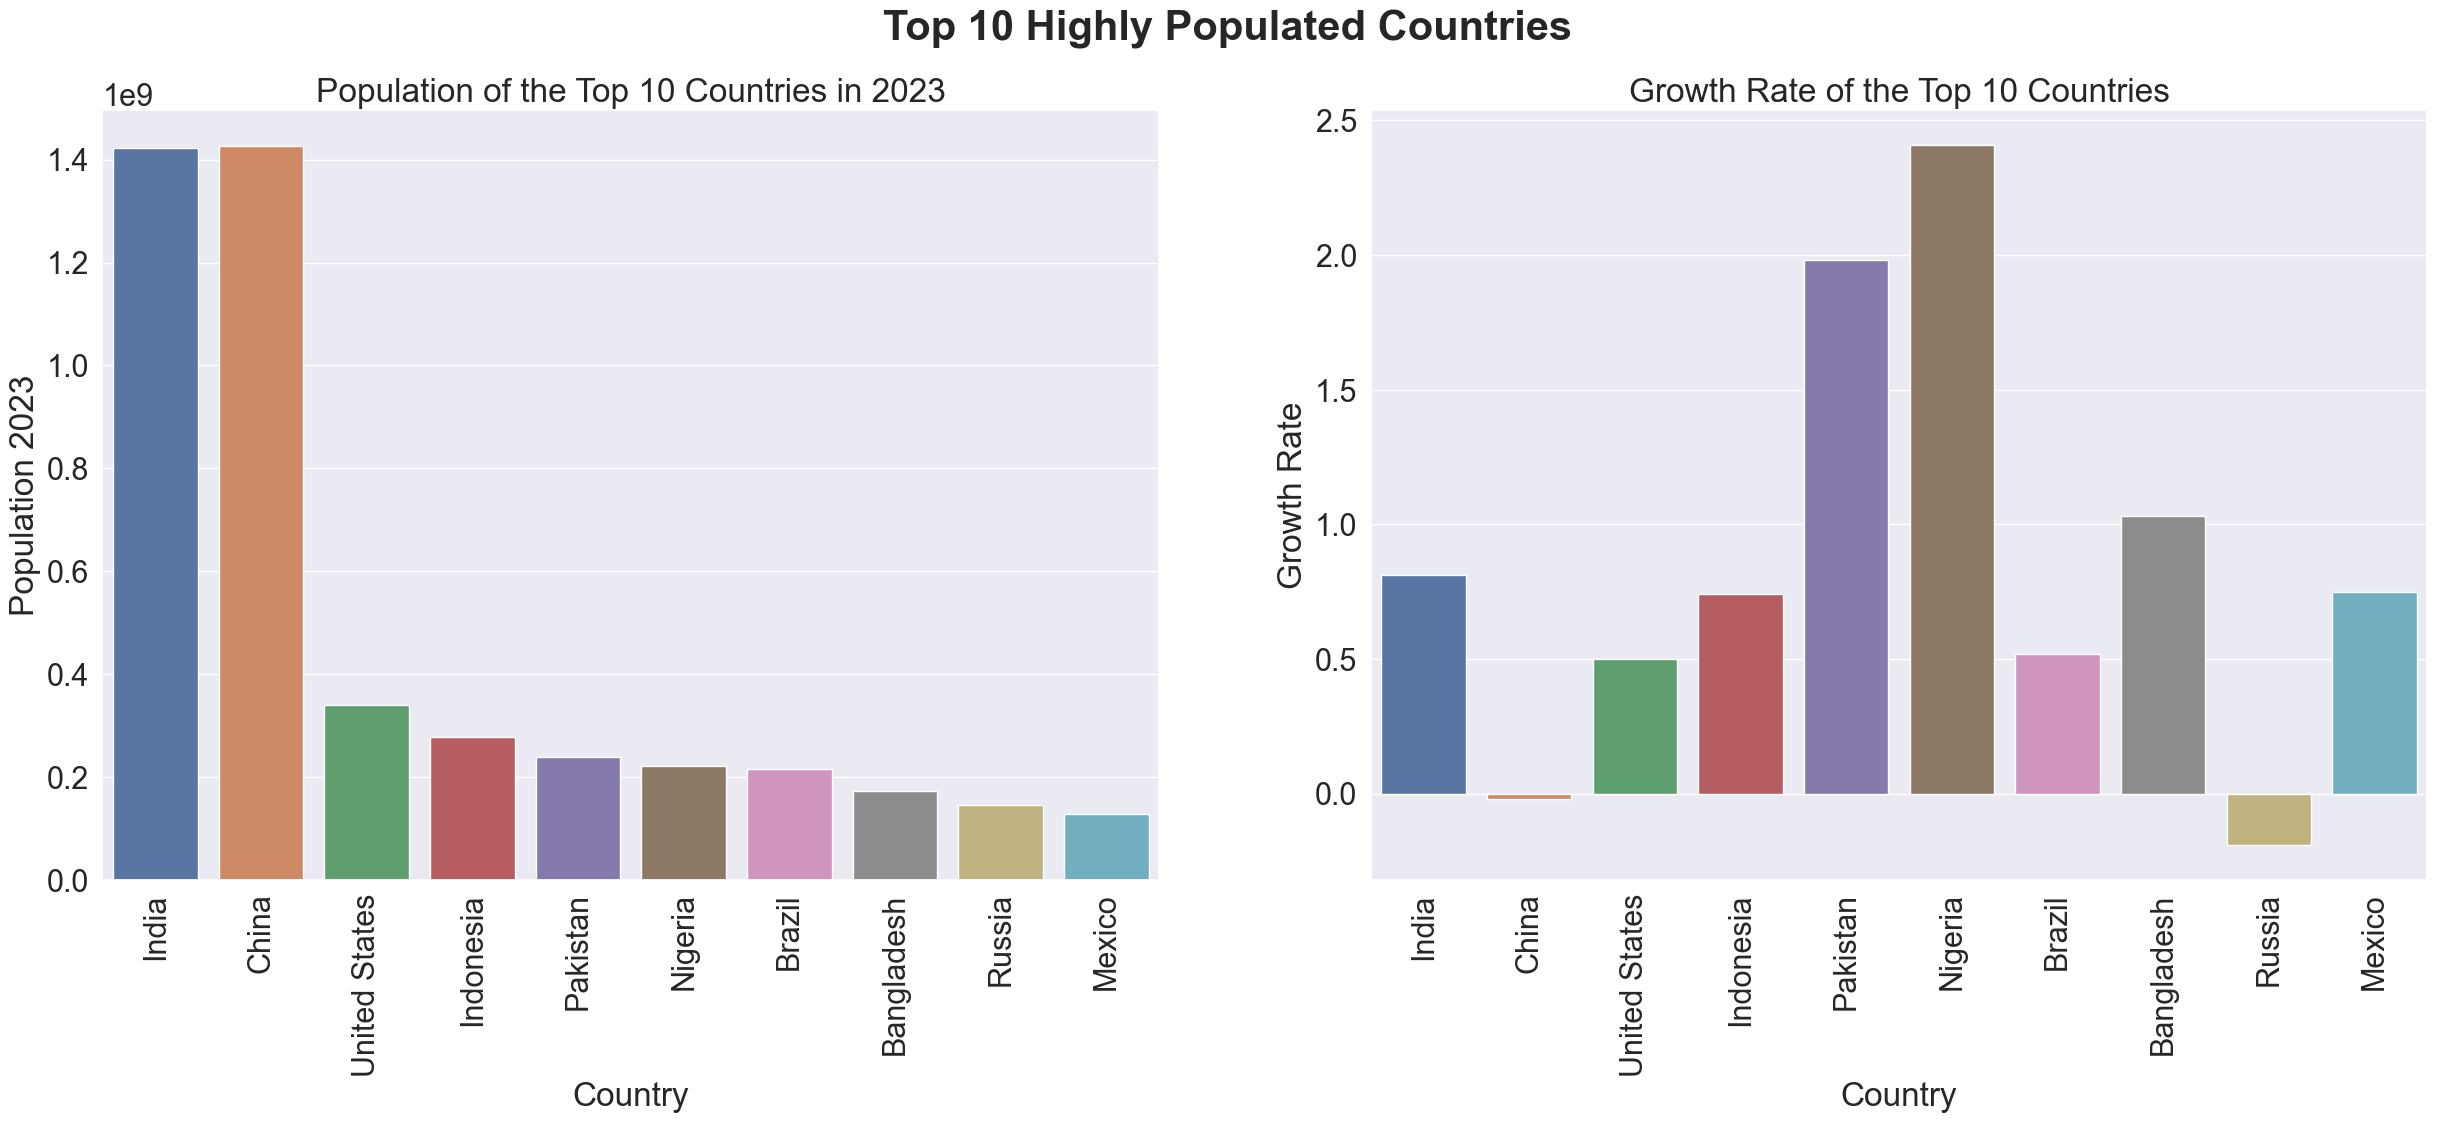

In [79]:
top_10 = df.head(10)

# Create a figure with two subplots
sns.set(font_scale=2)
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Top 10 Highly Populated Countries", fontsize=30, fontweight="bold")


# Bar plot for population of each country
sns.barplot(x="Country", y="Population 2023", data=top_10, ax=axes[0])
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Population 2023")
axes[0].set_title("Population of the Top 10 Countries in 2023")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Bar plot for growth rate of each country
sns.barplot(x="Country", y="Growth Rate", data=top_10, ax=axes[1])
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Growth Rate")
axes[1].set_title("Growth Rate of the Top 10 Countries")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Show the plot
plt.show()

#### Insights:
- India is the most densely populated country with 1.4B people followed by China, United States and others.
- Looking at the growth rates of top 10 highly populated nations Nigeria is leading with a growth rate of 2.41% followed by Pakistan, Bangladesh and others.

### Population and Growth Rate of the Bottom 10 Least Populated Countries in 2023

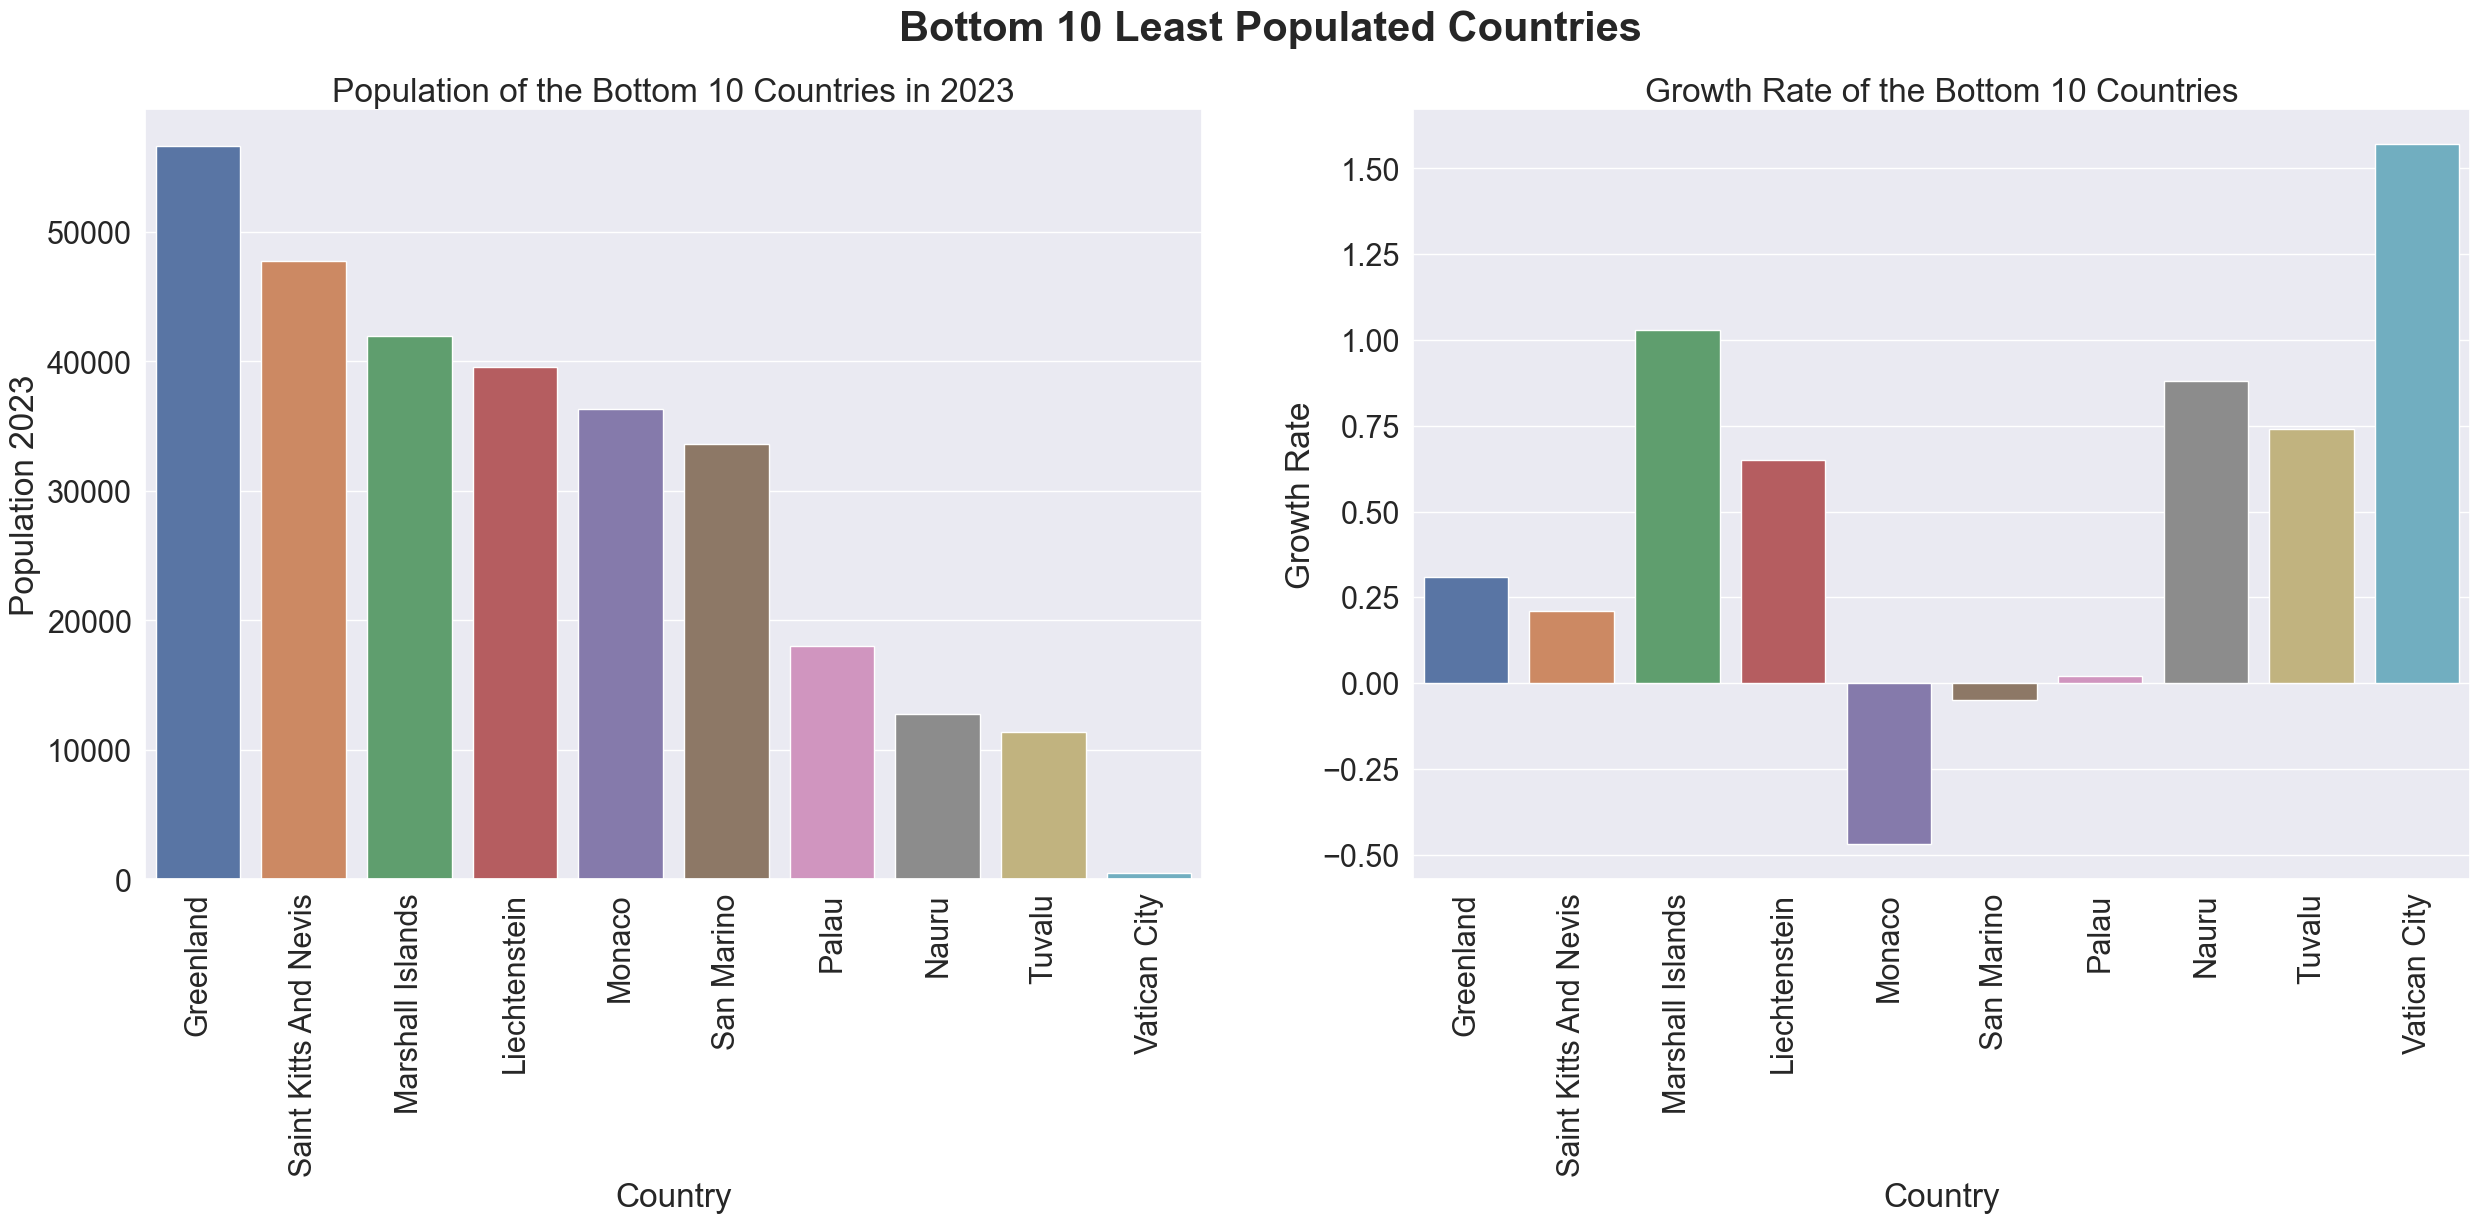

In [80]:
bottom_10 = df.tail(10)

# Create a figure with two subplots
sns.set(font_scale=2)
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle("Bottom 10 Least Populated Countries", fontsize=30, fontweight="bold")


# Bar plot for population of each country
sns.barplot(x="Country", y="Population 2023", data=bottom_10, ax=axes[0])
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Population 2023")
axes[0].set_title("Population of the Bottom 10 Countries in 2023")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Bar plot for growth rate of each country
sns.barplot(x="Country", y="Growth Rate", data=bottom_10, ax=axes[1])
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Growth Rate")
axes[1].set_title("Growth Rate of the Bottom 10 Countries")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Show the plot
plt.show()

#### Insights:
- Vatican City is the least populated country with 518 people followed by Tuvalu, Nauru and others.
- Looking at the growth rates of bottom 10 least populated nations Vactican City is leading with a growth rate of 1.57% followed by Marshall Islands, Nauru and others.

# 6. Asking and answering questions
The final step is to ask and answer questions about the data to gain insights and understand the underlying structure and relationships.

###  What are the top five countries with the fastest population growth?


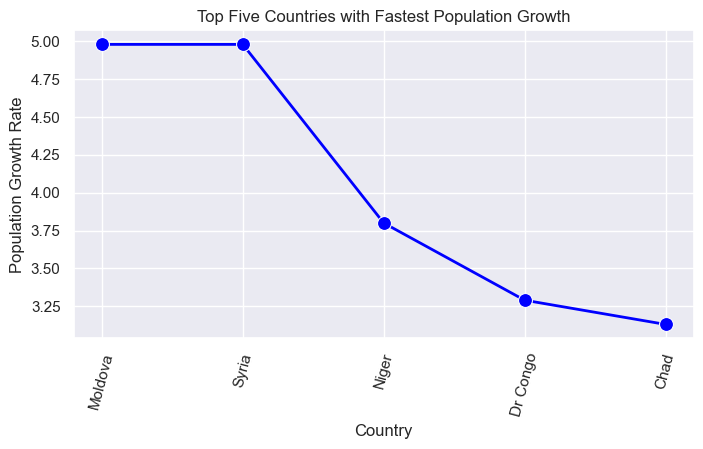

In [81]:
# Sort the data by population growth rate
df.sort_values("Growth Rate", ascending=False, inplace=True)

# Select the Top Five Countries
top_five = df.head(5)

# Plot the data
sns.set(font_scale=1)
plt.figure(figsize =(8,4))
sns.lineplot(x="Country", y="Growth Rate", data=top_five, marker = "o", color = "blue",markersize=10 ,linewidth=2)
plt.xlabel("Country")
plt.ylabel("Population Growth Rate")
plt.xticks(rotation =75)
plt.title("Top Five Countries with Fastest Population Growth")
plt.show()

#### Insights:
- Moldova and Syria are the top two countries with the elevated growth rate of 4.98%.

### What are the bottom five countries with the slowest population growth?

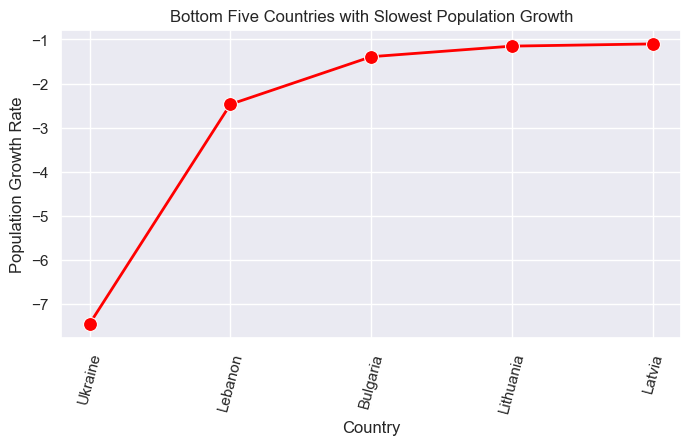

In [82]:
# Sort the data by population growth rate
df.sort_values("Growth Rate", ascending=True, inplace=True)

# Select the Top Five Countries
bottom_five = df.head(5)

# Plot the data
sns.set(font_scale=1)
plt.figure(figsize =(8,4))
sns.lineplot(x="Country", y="Growth Rate", data=bottom_five, marker = "o", color = "red",markersize=10 ,linewidth=2)
plt.xlabel("Country")
plt.ylabel("Population Growth Rate")
plt.xticks(rotation =75)
plt.title("Bottom Five Countries with Slowest Population Growth")
plt.show()

#### Insights:
- Population of Ukraine has decreased tremendously by 7.45% followed by Lebanon.

### What are the top 10 most densely populated countries?

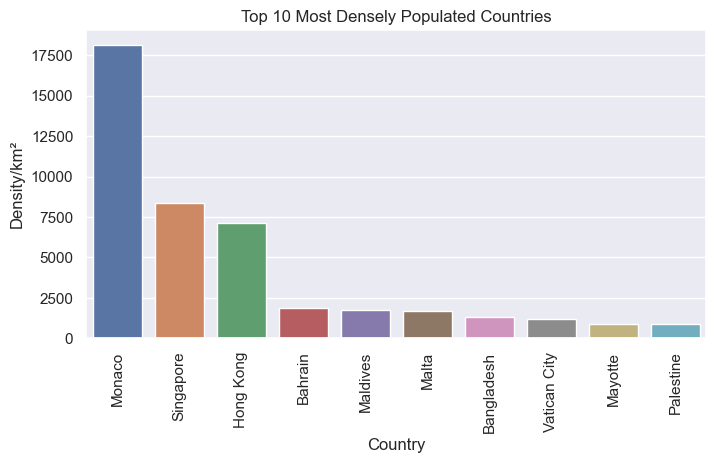

In [83]:
# Sort the data by "Density (/km²)" 
df.sort_values("Density (/km²)", ascending=False, inplace=True)

# Select the Top Five Countries
top_ten = df.head(10)

# Plot the data
sns.set(font_scale=1)
plt.figure(figsize =(8,4))
sns.barplot(x="Country", y= "Density (/km²)" , data=top_ten)
plt.xlabel("Country")
plt.ylabel("Density/km²")
plt.xticks(rotation =90)
plt.title("Top 10 Most Densely Populated Countries")
plt.show()

#### Insights: 
- Monaco is the most densely populated country with more than 18,149 people in per square kilometer followed by Singapore, Hong Kong and others.

### What are the bottom 10 least densely populated countries?

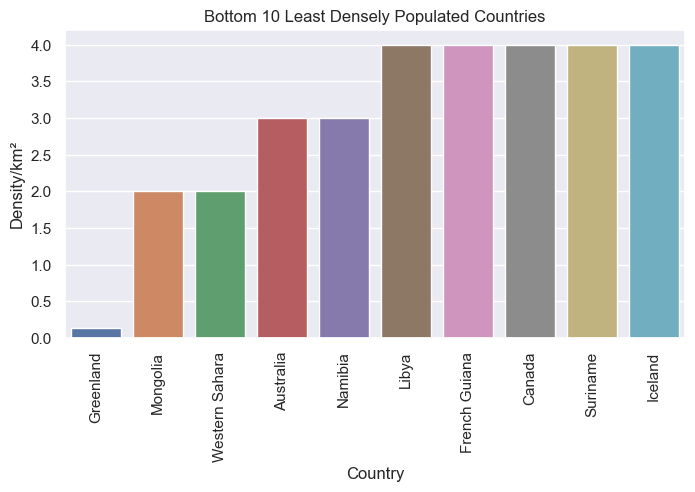

In [84]:
# Sort the data by "Density (/km²)" 
df.sort_values("Density (/km²)", ascending=True, inplace=True)

# Select the Bottom Five Countries
bottom_ten = df.head(10)

# Plot the data
sns.set(font_scale=1)
plt.figure(figsize =(8,4))
sns.barplot(x="Country", y= "Density (/km²)" , data=bottom_ten)
plt.xlabel("Country")
plt.ylabel("Density/km²")
plt.xticks(rotation =90)
plt.title("Bottom 10 Least Densely Populated Countries")
plt.show()

#### Insights:
- Greenland is the least densely populated country with 0.14 people in per square kilometer followed by Mongolia, Western Sahara and others.

# Thank You

I would like to extend my gratitude to you for taking the time to view this notebook. I hope you have found the analysis and insights presented here to be informative and helpful. Your support and feedback are greatly appreciated. Thank you!
